In [1]:
import os
os.environ['DISPLAY'] = ':0.0'
import shutil
import numpy as np
import pandas as pd
from pathlib import Path
from GFG import Ctx
from GFG.model import Nf
from GFG.identity import IDModel
from GFG.model import Furmap, hcol
from ogbGL.draw_objects import Camera

np.random.seed(42)
try:
    ROOT = Path(__file__).parents[1]
except:
    ROOT = Path('/home/lukass/deep-gmf')

Made context-safe: Ebo bind <class 'function'>
Made context-safe: Ebo delete <class 'function'>
Made context-safe: Vbo bind <class 'function'>
Made context-safe: Vbo update <class 'function'>
Made context-safe: Vbo delete <class 'function'>
Made context-safe: Texture create_texture2D <class 'function'>
Made context-safe: Texture create_texture2DMS <class 'function'>
Made context-safe: Texture create_texture2Darr <class 'function'>
Made context-safe: Texture set_as_active <class 'function'>
Made context-safe: Texture delete <class 'function'>
Made context-safe: Renderbuffer create_renderbuffer <class 'function'>
Made context-safe: Renderbuffer create_renderbufferMS <class 'function'>
Made context-safe: Renderbuffer delete <class 'function'>
Made context-safe: Fbo bind <class 'function'>
Made context-safe: Fbo initialise <class 'function'>
Made context-safe: Fbo assert_complete <class 'function'>
Made context-safe: Fbo delete <class 'function'>
Made context-safe: ShaderProgram update_uni

In [6]:
# Load identity model
data_path = '/analyse/Project0294/GFG_data/model_HDB_linear_v2dense_compact.mat'
#idm = IDModel.load(data_path)
base_nf = Nf.from_default()

furmap = Furmap(hcol=hcol['Terra Cotta'], nlayers=120, density=1.)
furmap.material.split_newmtl(mat_groups = base_nf.material_groups,
                             fvt = base_nf.face_tuple.fv,
                             vt = base_nf.vertex_tuple.dSvt,
                             groupfidx = base_nf.groupfindex)
base_nf.attach_fur(furmap, name='fur')

In [7]:
# Setup openGL context + camera
ctx = Ctx(res=(256, 256), renderscale=4.)
ctx.camera[0] = Camera(
    ctx.win, ctx._ar,
    target = [-11.5644, -13.0381, 0],
    eye = [-11.5644, -13.0381, 450.],
    up = [0,1,0],
    FOV = 50,
    near = 100.0,
    far = 1000.0
)
ctx.transform_lights(0, 0, 0, order='xyz')

In [4]:
N_IDS = 1
x_rots = [-60, -45, -30, -15, 0, 15, 30, 45, 60]
y_rots = [-60, -45, -30, -15, 0, 15, 30, 45, 60]
z_rots = [0, 45, 90, 135, 180, 225, 270, 315]
x_trans = [-50, -25, 0, 25, 50]
y_trans = [-50, -25, 0, 25, 50]
z_trans = [0]#-300, -200, -100, 0, 100]

if (ROOT / 'data' / 'gender-M').exists():
    shutil.rmtree(ROOT / 'data' / 'gender-M')

gender, ethn, age = 'M', 'WC', 25
    
v_coeff = np.random.normal(0, 1, size=len(idm))
t_coeff = np.random.normal(0, 1, size=(idm.nbands, len(idm)))

tdet = np.load(ROOT / 'GFG_data' / 'tdet.npy')
nf = idm.generate(v_coeff, t_coeff, ethnicity=ethn, gender=gender, age=age,
                  basenf=base_nf, tdet=tdet)
nf.attach(ctx)
head_idx = nf.groupvindex[nf.groupnames.index('head')] - 1
com = nf.v[head_idx, :].mean(axis=0)  # center of mass

In [20]:
from pathlib import Path
ctx.set_lights(Path('lights.yaml'))
#ctx.transform_lights(0, 0, 0, [0, 0, 0])

import imageio
with imageio.get_writer('lights.gif', mode='I', fps=60) as writer:
    #for i in range(360):
    #    ctx.transform_lights(1, 0, 0, [0, 0, 0])        
    #    img = ctx.render('image')
    #    writer.append_data(np.array(img))
        
    #for i in range(360):
    #    ctx.transform_lights(0, 1, 0, [0, 0, 0])        
    #    img = ctx.render('image')
    #    writer.append_data(np.array(img))
        
    for i in range(360):
        ctx.transform_lights(0, 0, 1, [0, 0, 0])        
        img = ctx.render('image')
        writer.append_data(np.array(img))
    

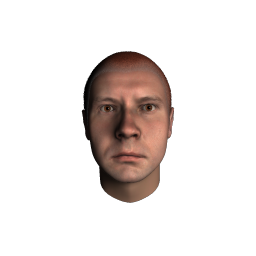

In [10]:
#ctx.set_lights(Path('lights.yaml'))
#ctx.transform_lights(0, 10, 0, [0, 0, 0])
#base_nf.attach(ctx)
img = ctx.render('image')
img